<a href="https://colab.research.google.com/github/Linda-lls/CEGE0004/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

In this notebook you will get familiar with the most popular dimensionality reduction and clustering algorithms.

## Dimensionality Reduction

Dimensionality reduction methods are used to reduce the dimensionality of a dataset. These are commonly used
for data exploration or to fight the curse of dimensionality when training supervised learning methods.

In order to be able to see how these algorithms behave, we will look at some examples of data living in a 3D
space that we would like to reduce to a 2D space.

The first dimensionality reduction method that we will look at is a projection method,
the Principal Component Analysis (PCA), then we will look at a manifold method, the Locally Linear Embeddings (LL).

### PCA

PCA seeks to find a hyperplane such that when projecting the original dataset onto it explains its largest variability.
In order to see PCA in action, we will generate a very simple dataset.
Let's now build a cloud of data points with the shape of an open ring in a 3D space.

In [ ]:
import numpy as np

# number of instances
m = 500

# noise terms
ns = lambda: 0.05 * np.random.randn(m)

# if you wish to close the ring you should remove the last term (15/16).
angles = np.random.rand(m) * 2 * np.pi * 15/16
xs = np.empty((m, 3))

xs[:, 0] = np.cos(angles) + np.sin(angles) + ns()
xs[:, 1] = np.sin(angles) * 0.7 + ns()
xs[:, 2] = xs[:, 0] * 0.1 + xs[:, 1] * 0.3 + ns()

We will now plot the dataset that we have just generated.

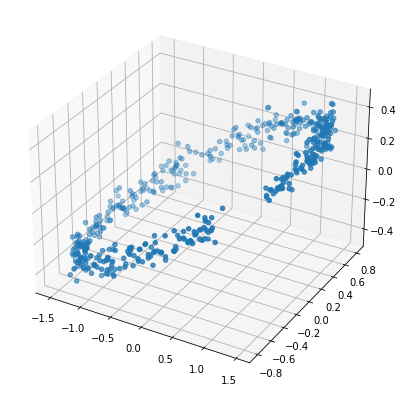

In [ ]:
import matplotlib.pyplot as plt

def plot_3d(xs, c=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d') # 111 means 1*1 grid, be the first subplot
    ax.scatter(xs[:,0], xs[:,1], xs[:,2], c=c) # x轴，y轴，z轴
    plt.show()

plot_3d(xs)

This dataset has been generated with a dimensionality that can be visualized. However, imagine what we could have done
if this was not the case. We could have plotted each dimension against the other as follows:

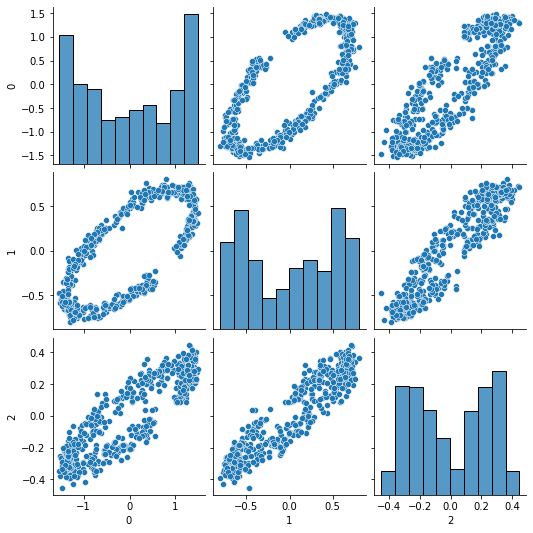

In [ ]:
import seaborn as sns
import pandas as pd

sns.pairplot(pd.DataFrame(xs))

Given the simplicity of the dataset, in this plots we can infer already a lot about the content of this dataset:
The shape lies on a 2D dimensional plane because out of the 3 plots only one has a shape that does not resemble a line.
However, for a dataset with a larger number of features or with more complicated feature interactions this strategy
would have not led us to anything useful. In these cases PCA may help us understand the dataset better.

We will use the scikit-learn implementation of PCA. This takes as a parameter the number of components, which is the
dimensionality of the hyperplane where the PCA will project the data.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 创建了一个PCA对象-pca, 将数据降维到2维
xs_2d = pca.fit_transform(xs) # 使用pca的fit_transform()方法将数据xs进行降维，并将结果赋值给xs_2d

print('The first 5 projected points:')
xs_2d[:5]

The first 5 projected points:


array([[ 1.40475726, -0.23144392],
       [-1.45586085,  0.30532546],
       [-0.28643308, -0.4992719 ],
       [-1.03742089, -0.37087168],
       [-0.89572508, -0.32077409]])

Let's now plot the result of this projection in a 2D plot:

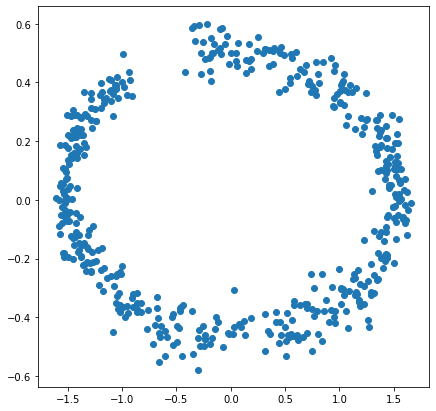

In [ ]:
def plot_2d(xs, c=None): # 定义了一个名为plot_2d的函数，它有两个参数：xs表示要绘制的2维数据点的坐标，c表示点的颜色，如果不指定，则默认为蓝色。
    fig = plt.figure(figsize=(7, 7)) # 创建一个新的图形对象，并将其大小设置为7英寸×7英寸。
    ax = fig.add_subplot(111)
    ax.scatter(xs[:, 0], xs[:, 1], c=c) # 由于数据已经被降到2维，因此可以直接使用这两个维度的坐标(xs[:, 0]横坐标，xs[:, 1]纵坐标)来绘制散点图。
    plt.show()

plot_2d(xs_2d) # 执行函数

In this example, PCA has successfully projected the 3D shape into a 2D space without loosing much information about
the original shape.

## Locally Linear Embeddings

Locally Linear Embeddings (LL) is a manifold based method. Manifold based methods assume that the data points do not
come from the whole space but from a manifold.

To test this algorithm we will generate our points using a helper function provided by scikit-learn. We will
generate points with a shape of a swiss roll. Our goal is to unfold the swiss roll using LL.
In this example we will also have a color indicator to better see which data points should be considered closer.

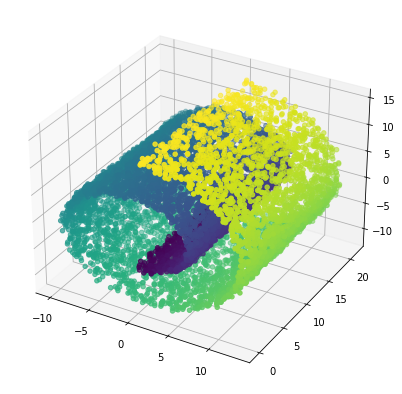

In [ ]:
from sklearn.datasets import make_swiss_roll # 该函数可以生成一个三维的“瑞士卷”数据集
xs, ys = make_swiss_roll(n_samples=10000, noise=0.2) # 调用make_swiss_roll函数生成数据集。n_samples参数指定数据集中的样本数量，noise参数指定在生成数据时添加到每个样本中的高斯噪声的标准差。
# xs储存特征，ys储存标签
plot_3d(xs, ys)

If we were to use a linear project, we would not be able to unfold the swiss roll.
Following an example of such a projection using two dimensions.

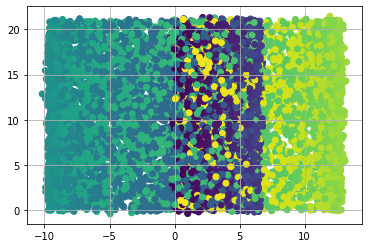

In [ ]:
plt.scatter(xs[:, 0], xs[:, 1], c=ys) 
# scatter表示在2维坐标系中绘制散点图
# xs[:, 0], xs[:, 1]表示3维数据点投影到2维平面上得到的坐标
# xs[:, 0]表示选取xs中的所有行，并取其中第一列作为新的一维数组，即抽取所有样本的第一个特征（第一列）。
# c=ys表示使用目标标签ys为每个点着色。因此，不同的颜色表示不同的类别。

plt.grid(True) # 调用grid()函数在图形中添加网格线。


We will now use the LL implementation of scikit-learn. LL takes as parameters, the number of components,
which is similar to PCA, and the number of neighbors LL should consider in order to reconstruct the manifold.

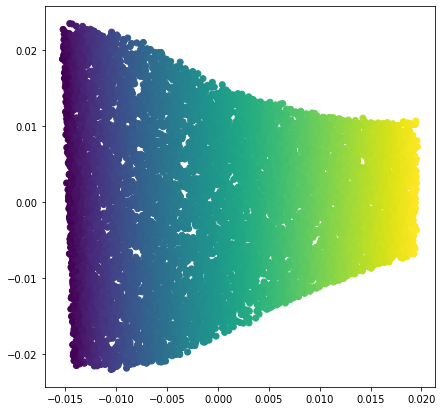

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=50) # n_neighbors参数指定在构建每个数据点的局部线性结构时考虑的最近邻个数
xs_2d = lle.fit_transform(xs) # 将数据集降到二维

plot_2d(xs_2d, ys) # 将每个样本表示为二维坐标系中的一个点，并使用目标标签ys为点着色，以表示不同的类别。

Here you can see that data points that have a similar color are closer to each other, meaning that the swiss roll has
been properly unfolded.

## Clustering

Clustering algorithms are used to find groups in data. In this notebook we will review some of the most popular
algorithms. We will start with K-Means, then DBSCAN, and conclude with Gaussian Mixture models.

### K-Means

K-means is a simple and effective algorithm. In order to test this algorithm we will generate a dataset made of blobs.

The dataset that we will generate here is made of blobs with different density.

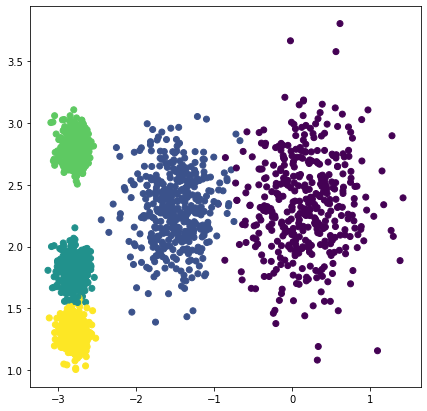

In [ ]:
from sklearn.datasets import make_blobs # 该函数可用于生成带有多个簇的合成数据集。

# the centroids of the blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

# the density of each blobs
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
# 这里blob_centers是一个包含五个二维坐标点的Numpy数组，表示每个簇的中心；blob_std是一个包含五个标量的Numpy数组，表示每个簇的数据点分布的标准差。

xs, ys = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std)
# 调用make_blobs函数生成带有2000个数据点的合成数据集。其中n_samples参数指定生成的数据点个数，centers参数传入簇的中心坐标，cluster_std参数传入每个簇的数据点分布的标准差。
plot_2d(xs, ys)

A parameter of K-means is the number of clusters we are expecting to find in the dataset (the $k$). In this case, since
we have constructed the dataset ourselves, we know that the best $k$ is 5. However, normally you do not know how many
clusters to expect, and you will need to inspect your results in order to see if the result of the clustering satisfies
you.

In [ ]:
from sklearn.cluster import KMeans

k = 5 # 通过上述合成数据集中簇的个数，得出最佳k值是5
k_means = KMeans(n_clusters=k) # n_clusters 聚类算法的簇数
k_means.fit(xs) # 使用数据集xs对k_means进行训练，即使用KMeans算法对数据集进行聚类。

print('Centroids of the clustering algorithm:') 
k_means.cluster_centers_ # 使用cluster_centers_属性(k, n_features)获取聚类算法得到的聚类中心坐标，表示k个簇中心的坐标，其中n_features是数据集中每个样本的特征数。

Centroids of the clustering algorithm:


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-2.79011407,  2.80578219],
       [ 0.18219782,  2.33824845],
       [-2.80077411,  1.30102618],
       [-1.46460731,  2.31024291],
       [-2.79708752,  1.80749256]])

If the K-means has successfully found all the clusters, then these centroids will be equal to the centroids we set when
generating the dataset.

To inspect this visually let's now plot the dataset with the centroids.

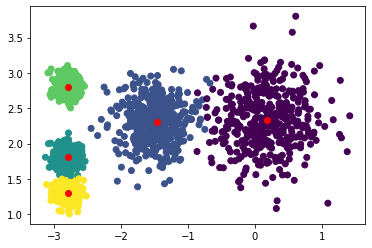

In [ ]:
plt.scatter(xs[:, 0], xs[:, 1], c=ys)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red')
# 使用scatter函数绘制聚类中心点的散点图: 横轴和纵轴分别使用聚类算法得到的中心点的第一个和第二个特征
plt.show()

Once we have found the clusters, we can use k-means to predict the cluster of any new example using the predict method.

In [ ]:
# 这段代码使用KMeans聚类算法对一组新的数据点进行预测，并输出它们所属的聚类簇的标签。
# we define a set of 5 points
xs_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# it will predict to which cluster these points belong
k_means.predict(xs_new) 
# 使用predict函数对新的数据点进行预测，并返回它们所属的聚类簇的标签。这里的聚类算法是之前用KMeans算法训练好的k_means模型。

array([1, 1, 0, 0], dtype=int32)

### DBSCAN

DBSCAN stands for Density-based spatial clustering of applications with noise (DBSCAN). This algorithm, given a set of
points in some space, groups together points that are closely packed together (points with many nearby neighbors),
marking as outliers those that lie alone in low-density regions (whose nearest neighbors are too far away).

To test this clustering algorithm we will generate a dataset made of moon shapes.

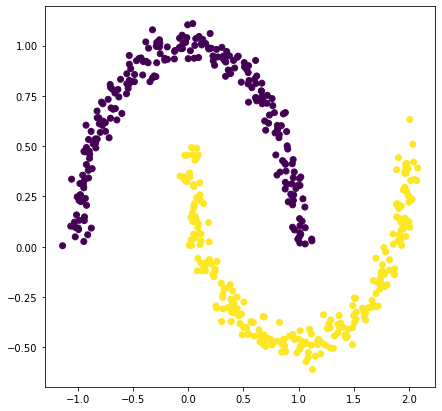

In [ ]:
from sklearn.datasets import make_moons

xs, ys = make_moons(n_samples=500, noise=0.05)

plot_2d(xs, ys) # 将每个样本表示为二维坐标系中的一个点，并使用目标标签ys为点着色，以表示不同的类别。

DBSCAN takes two parameters: The $\varepsilon$ distance which is used to decide at which distance a point should be
considered a neighbor, and the number of samples: the number of points that within the $\varepsilon$ distance
qualify a point as being a core-instance.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(xs) # 使用fit函数对数据集进行聚类，得到每个数据点所属的聚类簇的标签。

print('The labels provided to the first 5 points of the dataset')
dbscan.labels_[:5] # 输出前5个数据点的聚类簇的标签

The labels provided to the first 5 points of the dataset


array([ 0,  1,  0, 11, -1])

Among the $m$ points in the dataset DBSCAN has found the following number of core instances:

In [ ]:
len(dbscan.core_sample_indices_)
# dbscan.core_sample_indices_：这是DBSCAN算法的一个属性，它包含了算法识别的核心点的索引; 使用len计算其长度，即核心点的数量

218

DBSCAN will also tell us how many clusters it has found:

In [ ]:
len(set(dbscan.labels_)) # 聚类的数量

36

Let's now plot each cluster with a different color and also
those points that have been marked as anomalies.

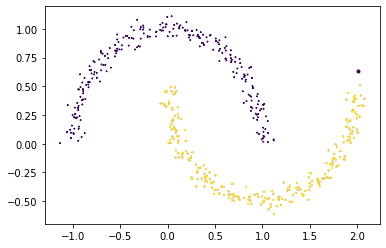

In [ ]:
def plot_dbscan(model, xs):
    core_mask = np.zeros_like(model.labels_, dtype=bool)
    core_mask[model.core_sample_indices_] = True # 核心点：TRUE when 对应数据点是核心点
    anomalies_mask = model.labels_ == -1 # 因为在 DBSCAN 中，未分配给任何集群的点被视为异常并分配了 -1 的标签
    non_core_mask = ~(core_mask | anomalies_mask) # ~ = NOT，

    cores = model.components_
    anomalies = xs[anomalies_mask] # 异常点：TRUE when 对应数据点被DBSCAN算法判定为异常点（即噪声点）
    non_cores = xs[non_core_mask] # 非核心点：TRUE when 对应数据点不是核心点且不是异常点

    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='o', s=1, cmap='Paired')
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=1, c=model.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=20)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=model.labels_[non_core_mask], marker=".")

plot_dbscan(dbscan, xs)
# This is a bad crictical

Given we know how many clusters are in the dataset, let's try to improve this clustering result by increasing the
$\varepsilon$ parameter.

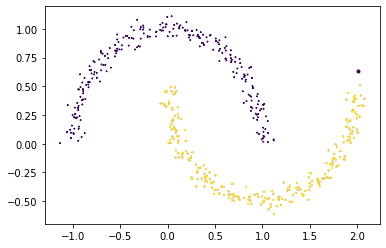

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(xs)

plot_dbscan(dbscan, xs)

### Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model that assumes that all the data points have been generated from a
mixture of a finite number of Gaussian distributions with unknown parameters.

For this model we will use the IRIS dataset.

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
xs = data.data
ys = data.target

data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's now visualize this dataset.

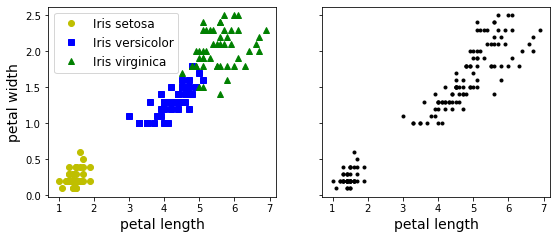

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3.5))

plt.subplot(121) # 1行2列，第一个位置
plt.plot(xs[ys==0, 2], xs[ys==0, 3], "yo", label="Iris setosa") 
# xs特征矩阵, ys目标变量向量, xs[ys==0, 2] and xs[ys==0, 3] means to select samples belonging to class 0, only the column 3rd column (petal length) and the 4th column (petal width)
# plots the petal length on the x-axis and petal width on the y-axis of all samples belonging to class 0.
plt.plot(xs[ys==1, 2], xs[ys==1, 3], "bs", label="Iris versicolor")
plt.plot(xs[ys==2, 2], xs[ys==2, 3], "g^", label="Iris virginica")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(xs[:, 2], xs[:, 3], c="k", marker=".")
plt.xlabel("petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

On the left-hand side we see the dataset with the known classification and on the right-hand side we have the dataset
we will use to cluster them. From now on, we will assume that those classifications are unknown.

Similar to k-means, GMM requires the specification of the number of clusters.

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(xs) # n_components=3: 指定 GMM 应将数据建模为 3 个高斯分布的混合

ys_pred = gmm.predict(xs)

We can now visualize the result of this clustering.

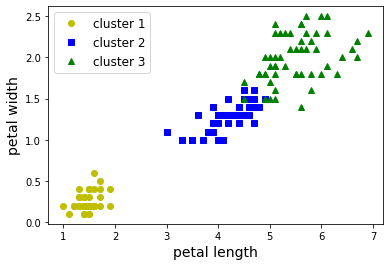

In [ ]:
plt.plot(xs[ys_pred==0, 2], xs[ys_pred==0, 3], "yo", label="cluster 1")
plt.plot(xs[ys_pred==1, 2], xs[ys_pred==1, 3], "bs", label="cluster 2")
plt.plot(xs[ys_pred==2, 2], xs[ys_pred==2, 3], "g^", label="cluster 3")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

It is now up to us to give the appropriate name to these clusters.